 # Chennai Weather for the Month - from Open Meteo

## Importing necessary libraries

In [1]:
#Required Libraries
import pandas as pd
import requests
import plotly.express as px
from datetime import date, timedelta
import warnings
warnings.filterwarnings("ignore")

## Setting up the required parameters

In [19]:
#Place - latitude, longitude
place='Chennai'
latitude = 13.0845
longitude = 80.2705
'''getting current date so that everytime we run the code, 
we stay with upto-date data
'''
today = date.today()
'''As this is a monthly weather report of our desired city, 
we set the start date as 1st of current month and 
the end date as the current date
'''
start_date = today.replace(day=1).isoformat()
'''date object is based on current date but day is set to 1. 
this preserves the month and year based on the current date
isformat() converts to a string rep YYYY-MM-DD or YYYY-MM-DDTHH:MM:SS.ffffff
'''

end_date = today.isoformat()
'''we are going to show the weather forecast for the next 7 days from current date
so days is set 7'''
forecast_end =(today+timedelta(days=7)).isoformat()

print(f"Fetching {place} weather data from {start_date} to {end_date}...")
print(f"And the forecast till {forecast_end}...")

'''
we have defined our location and the date range as per our requirements
'''


Fetching Chennai weather data from 2025-10-01 to 2025-10-25...
And the forecast till 2025-10-25...


'\nwe have defined our location and the date range as per our requirements\n'

## Historical Data of the Month

In [20]:
#Gettin the Weather History of the place
#link to archive api is available in https://open-meteo.com/en/docs/historical-weather-api

archive_url = "https://archive-api.open-meteo.com/v1/archive"
'''
The Params are defined based on their availablility in the respective API documentation
'''
archive_params = {"latitude":latitude,
                  "longitude":longitude,
                  "start_date":start_date,
                  "end_date":end_date,
                  "daily":"weather_code,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,precipitation_hours,wind_speed_10m_max",
                  "timezone":"auto"}
'''
Make sure the daily param is a comma seperated list without spaces.
The parameters we need are set and now historical data is to be fetched
as a request to the archive api url
'''
historical_data = requests.get(archive_url, params=archive_params).json()
print(historical_data)

{'latitude': 13.110721, 'longitude': 80.2459, 'generationtime_ms': 4.15349006652832, 'utc_offset_seconds': 19800, 'timezone': 'Asia/Kolkata', 'timezone_abbreviation': 'GMT+5:30', 'elevation': 11.0, 'daily_units': {'time': 'iso8601', 'weather_code': 'wmo code', 'temperature_2m_max': '°C', 'temperature_2m_min': '°C', 'precipitation_sum': 'mm', 'rain_sum': 'mm', 'precipitation_hours': 'h', 'wind_speed_10m_max': 'km/h'}, 'daily': {'time': ['2025-10-01', '2025-10-02', '2025-10-03', '2025-10-04', '2025-10-05', '2025-10-06', '2025-10-07', '2025-10-08', '2025-10-09', '2025-10-10', '2025-10-11', '2025-10-12', '2025-10-13', '2025-10-14', '2025-10-15', '2025-10-16', '2025-10-17', '2025-10-18', '2025-10-19', '2025-10-20', '2025-10-21', '2025-10-22', '2025-10-23', '2025-10-24', '2025-10-25'], 'weather_code': [51, 51, 51, 63, 65, 63, 63, 55, 63, 51, 61, 53, 63, 63, 63, 63, 63, 65, 63, 63, 63, 63, 63, 55, 65], 'temperature_2m_max': [31.8, 32.8, 33.0, 31.5, 33.0, 32.7, 31.4, 31.6, 31.5, 30.4, 31.1, 30

In [21]:
'''Base on the historical data from the api, we are about to create a dataframe to
work with the numbers'''
print(historical_data.get("daily",[]))
'''
daily comes with 'time' of type date
'''

{'time': ['2025-10-01', '2025-10-02', '2025-10-03', '2025-10-04', '2025-10-05', '2025-10-06', '2025-10-07', '2025-10-08', '2025-10-09', '2025-10-10', '2025-10-11', '2025-10-12', '2025-10-13', '2025-10-14', '2025-10-15', '2025-10-16', '2025-10-17', '2025-10-18', '2025-10-19', '2025-10-20', '2025-10-21', '2025-10-22', '2025-10-23', '2025-10-24', '2025-10-25'], 'weather_code': [51, 51, 51, 63, 65, 63, 63, 55, 63, 51, 61, 53, 63, 63, 63, 63, 63, 65, 63, 63, 63, 63, 63, 55, 65], 'temperature_2m_max': [31.8, 32.8, 33.0, 31.5, 33.0, 32.7, 31.4, 31.6, 31.5, 30.4, 31.1, 30.7, 31.7, 30.8, 28.1, 29.1, 28.2, 27.3, 28.7, 28.2, 26.6, 29.0, 29.7, 27.2, 28.2], 'temperature_2m_min': [25.7, 25.7, 25.6, 24.4, 25.2, 24.7, 25.7, 26.0, 24.1, 25.0, 25.5, 25.4, 25.5, 25.1, 24.5, 24.2, 24.8, 24.6, 24.2, 24.0, 24.5, 25.2, 24.3, 24.6, 24.3], 'precipitation_sum': [0.3, 0.2, 0.6, 7.1, 12.4, 10.7, 7.8, 1.4, 10.3, 0.4, 2.6, 1.8, 10.2, 9.9, 35.3, 20.7, 13.7, 27.5, 7.8, 23.2, 28.9, 38.5, 17.1, 6.2, 18.3], 'rain_sum': 

"\ndaily comes with 'time' of type date\n"

In [22]:
daily_data = historical_data.get("daily",{})#accessing "daily" key from the response
daily_data.keys()

dict_keys(['time', 'weather_code', 'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum', 'rain_sum', 'precipitation_hours', 'wind_speed_10m_max'])

In [23]:
#we are dealing with weather_code param
'''
Based on weather variable documentation  / WMO Weather interpretation codes (WW)
https://open-meteo.com/en/docs
'''
weather_map = {
    0: "Clear sky",
    1: "Mainly clear",
    2: "Partly cloudy",
    3: "Overcast",
    45: "Fog",
    48: "Depositing rime fog",
    51: "Drizzle: Light",
    53: "Drizzle: Moderate",
    55: "Drizzle: Dense intensity",
    56: "Freezing Drizzle: Light",
    57: "Freezing Drizzle: Dense intensity",
    61: "Rain: Slight",
    63: "Rain: Moderate",
    65: "Rain: Heavy intensity",
    66: "Freezing Rain: Light",
    67: "Freezing Rain: Heavy intensity",
    71: "Snow fall: Slight",
    73: "Snow fall: Moderate",
    75: "Snow fall: Heavy intensity",
    77: "Snow grains",
    80: "Rain showers: Slight",
    81: "Rain showers: Moderate",
    82: "Rain showers: Violent",
    85: "Snow showers: Slight",
    86: "Snow showers: Heavy",
    95: "Thunderstorm: Slight or moderate",
    96: "Thunderstorm with slight hail",
    99: "Thunderstorm with heavy hail"
}

In [24]:
'''Based on the daily data keys, 
we can name the dataframe columns accordingly'''
hist_df = pd.DataFrame({
    "Date" : daily_data.get("time", []),
    #"Weather" : daily_data.get("weather_code", []),#only to display code
    "Weather" : [weather_map.get(w_code, str(w_code)) for w_code in daily_data.get("weather_code", [])],
    "Max Temp" : daily_data.get("temperature_2m_max", []),
    "Min Temp" : daily_data.get("temperature_2m_min", []),
    "Rainfall" : daily_data.get("precipitation_sum", []),
    "Sum of Daily Rain" : daily_data.get("rain_sum", []),
    "Hours with Rain" : daily_data.get("precipitation_hours", []),
    "Wind Speed" :  daily_data.get("wind_speed_10m_max", []),
    "Type" : "Historical"
})
print(hist_df.shape)
print(hist_df.head())

(25, 9)
         Date                Weather  Max Temp  Min Temp  Rainfall  \
0  2025-10-01         Drizzle: Light      31.8      25.7       0.3   
1  2025-10-02         Drizzle: Light      32.8      25.7       0.2   
2  2025-10-03         Drizzle: Light      33.0      25.6       0.6   
3  2025-10-04         Rain: Moderate      31.5      24.4       7.1   
4  2025-10-05  Rain: Heavy intensity      33.0      25.2      12.4   

   Sum of Daily Rain  Hours with Rain  Wind Speed        Type  
0                0.3              2.0        13.4  Historical  
1                0.2              2.0        13.6  Historical  
2                0.6              3.0        14.2  Historical  
3                7.1              7.0        21.0  Historical  
4               12.4              6.0        12.9  Historical  


In [25]:
#checking whether all our weather codes were mapped accordingly
print(hist_df['Weather'].value_counts())

Weather
Rain: Moderate              14
Drizzle: Light               4
Rain: Heavy intensity        3
Drizzle: Dense intensity     2
Rain: Slight                 1
Drizzle: Moderate            1
Name: count, dtype: int64


### Visualizing Historical data of the month

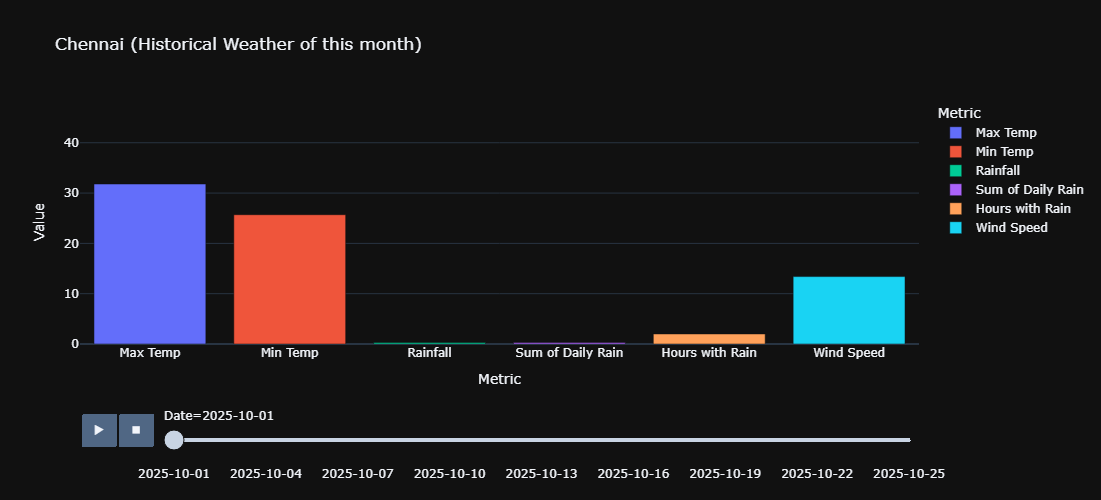

In [26]:
'''
we can now visualize the Weather history of the current month
keeping the Date, Weather condition and Type as Historical/forecast 
as variables here
'''
hist_df_melt = hist_df.melt(
    id_vars = ["Date", "Weather", "Type"],
    var_name = "Metric",#Metric will be the name of our new col that stores maxtemp, mintemp etc.
    value_name = "Value")#this will have the value of the metrics
'''
creating an animated bar chart grouped along with each metric
on hovering we can see the weather on that particular date
bar for every date
'''
fig = px.bar(hist_df_melt, x="Metric", y="Value", color="Metric",
             animation_frame = "Date",
             animation_group = "Metric",
             hover_data = ["Weather"],
             range_y = [0, hist_df_melt["Value"].max()+10],
             #range_x is not needed here as our categories are fixed. but we can for the limits if needed
             title = place +" (Historical Weather of this month)"
            )
fig.update_layout(template = "plotly_dark",
                  height = 500,
                  width = 1050)
fig.show()


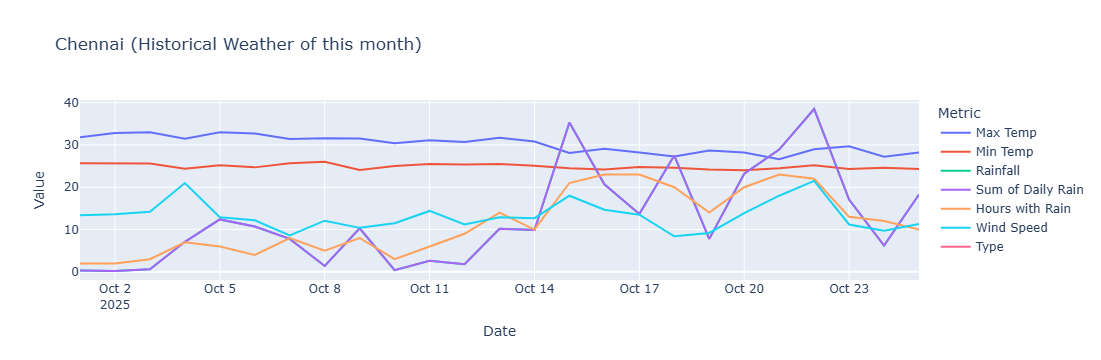

In [37]:
#LINE PLOT - Additional View
hist_df_line_melt = hist_df.melt(id_vars = ["Date", "Weather"],
                                 var_name="Metric",
                                 value_name="Value")
figl = px.line(hist_df_line_melt, x="Date", y="Value", color="Metric",
              line_group = "Metric",
              hover_data = ["Weather"],
              title = place +" (Historical Weather of this month)"
             )
figl.show()

## Forecast Data of the Month

In [27]:
#Gettin the Weather Forecase of the place
#link to forecast api is available in https://open-meteo.com/en/docs

forecast_url = "https://api.open-meteo.com/v1/forecast"
'''
The Params are defined based on their availablility in the respective API documentation
'''
forecast_params = {"latitude":latitude,
                   "longitude":longitude,
                   "daily":"weather_code,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,precipitation_hours,wind_speed_10m_max",
                   "forecast_days" : 7,
                  "timezone":"auto"}
'''
Make sure the daily param is a comma seperated list without spaces.
The parameters we need are set and now historical data is to be fetched
as a request to the archive api url
'''
forecast_data = requests.get(forecast_url, params = forecast_params).json()
forecast_data

{'latitude': 13.0,
 'longitude': 80.125,
 'generationtime_ms': 0.10371208190917969,
 'utc_offset_seconds': 19800,
 'timezone': 'Asia/Kolkata',
 'timezone_abbreviation': 'GMT+5:30',
 'elevation': 11.0,
 'daily_units': {'time': 'iso8601',
  'weather_code': 'wmo code',
  'temperature_2m_max': '°C',
  'temperature_2m_min': '°C',
  'precipitation_sum': 'mm',
  'rain_sum': 'mm',
  'precipitation_hours': 'h',
  'wind_speed_10m_max': 'km/h'},
 'daily': {'time': ['2025-10-25',
   '2025-10-26',
   '2025-10-27',
   '2025-10-28',
   '2025-10-29',
   '2025-10-30',
   '2025-10-31'],
  'weather_code': [95, 80, 61, 80, 3, 3, 3],
  'temperature_2m_max': [30.2, 30.5, 25.7, 29.9, 31.2, 32.4, 32.8],
  'temperature_2m_min': [24.7, 25.2, 24.4, 23.9, 24.9, 25.5, 25.6],
  'precipitation_sum': [4.8, 1.1, 6.9, 3.8, 0.0, 0.0, 0.3],
  'rain_sum': [0.0, 0.0, 6.9, 0.0, 0.0, 0.0, 0.0],
  'precipitation_hours': [8.0, 3.0, 13.0, 8.0, 0.0, 0.0, 3.0],
  'wind_speed_10m_max': [10.2, 9.8, 15.3, 14.6, 11.5, 7.2, 6.8]}}

In [28]:
forecast_daily_data = forecast_data.get("daily", {})
forecast_daily_data.keys()

dict_keys(['time', 'weather_code', 'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum', 'rain_sum', 'precipitation_hours', 'wind_speed_10m_max'])

In [29]:
'''Based on the forecasr daily data keys, 
we can name the dataframe columns accordingly'''
forecast_df = pd.DataFrame({
    "Date": forecast_daily_data.get("time", []),
    "Weather": [weather_map.get(fw_code, str(fw_code)) for fw_code in forecast_daily_data.get("weather_code", [])],
    "Max Temp" :forecast_daily_data.get("temperature_2m_max", []),
    "Min Temp" : forecast_daily_data.get("temperature_2m_min", []),
    "Rainfall" : forecast_daily_data.get("precipitation_sum", []),
    "Sum of Daily Rain": forecast_daily_data.get("rain_sum", []),
    "Hours with Rain" : forecast_daily_data.get("precipitation_hours", []),
    "Wind Speed" : forecast_daily_data.get("wind_speed_10m_max", []),
    "Type" : "Forecast"
})
print(forecast_df.shape)
print(forecast_df.head())

(7, 9)
         Date                           Weather  Max Temp  Min Temp  Rainfall  \
0  2025-10-25  Thunderstorm: Slight or moderate      30.2      24.7       4.8   
1  2025-10-26              Rain showers: Slight      30.5      25.2       1.1   
2  2025-10-27                      Rain: Slight      25.7      24.4       6.9   
3  2025-10-28              Rain showers: Slight      29.9      23.9       3.8   
4  2025-10-29                          Overcast      31.2      24.9       0.0   

   Sum of Daily Rain  Hours with Rain  Wind Speed      Type  
0                0.0              8.0        10.2  Forecast  
1                0.0              3.0         9.8  Forecast  
2                6.9             13.0        15.3  Forecast  
3                0.0              8.0        14.6  Forecast  
4                0.0              0.0        11.5  Forecast  


In [30]:
#Together visualizing the historical and forecast data
this_month_weather = pd.concat([hist_df, forecast_df], ignore_index=True)
this_month_weather["Date"] = pd.to_datetime(this_month_weather["Date"])
print(this_month_weather.shape)

(32, 9)


In [32]:
#lets see this month weather date history+predicted of Chennai
print(this_month_weather[["Date", "Weather", "Type"]])

         Date                           Weather        Type
0  2025-10-01                    Drizzle: Light  Historical
1  2025-10-02                    Drizzle: Light  Historical
2  2025-10-03                    Drizzle: Light  Historical
3  2025-10-04                    Rain: Moderate  Historical
4  2025-10-05             Rain: Heavy intensity  Historical
5  2025-10-06                    Rain: Moderate  Historical
6  2025-10-07                    Rain: Moderate  Historical
7  2025-10-08          Drizzle: Dense intensity  Historical
8  2025-10-09                    Rain: Moderate  Historical
9  2025-10-10                    Drizzle: Light  Historical
10 2025-10-11                      Rain: Slight  Historical
11 2025-10-12                 Drizzle: Moderate  Historical
12 2025-10-13                    Rain: Moderate  Historical
13 2025-10-14                    Rain: Moderate  Historical
14 2025-10-15                    Rain: Moderate  Historical
15 2025-10-16                    Rain: M

### Visualizing Both Historical and Forecast data of the month

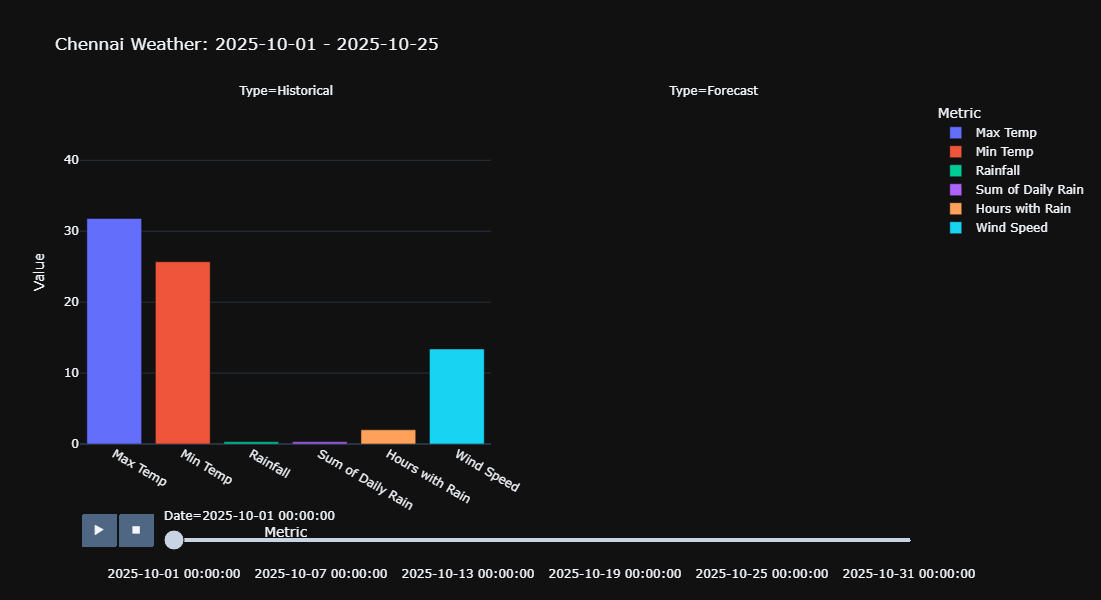

In [33]:
#Animated visualization
'''
Here we have dates under each type historical/forecast, so our vars will be these 2
'''
this_month_weather_melt = this_month_weather.melt(id_vars = ["Date","Weather","Type"],
                                                  var_name = "Metric",
                                                  value_name = "Value")
#ensuring all "Value" is numeric -
'''
We are having multiple colums for Value with different data types like temp - float, weather - string
on using pd.melt() - all comes under Value. If any non-numeric value is present then value will have mixed types.
so before plotting we need to make sure converting VALUE to NUMERIC .
this converts non-numeric to NaN that plotly skips

'''
try:
    fig1 = px.bar(this_month_weather_melt, x="Metric", y="Value", color="Metric",
                  animation_frame = "Date",
                  animation_group= "Metric",
                  facet_col = "Type",  #we are going to have side by side panel for 2 types
                  hover_data=["Weather"],
                  range_y = [0, this_month_weather_melt["Value"].max() + 10],
                  title = f"{place} Weather: {start_date} - {end_date}"
                 )
    
    fig1.update_layout(template = "plotly_dark", 
                      height = 600, 
                      width = 1050)
    fig1.show()
except Exception as e:
    print(f"Exceution failed due to : {e}")

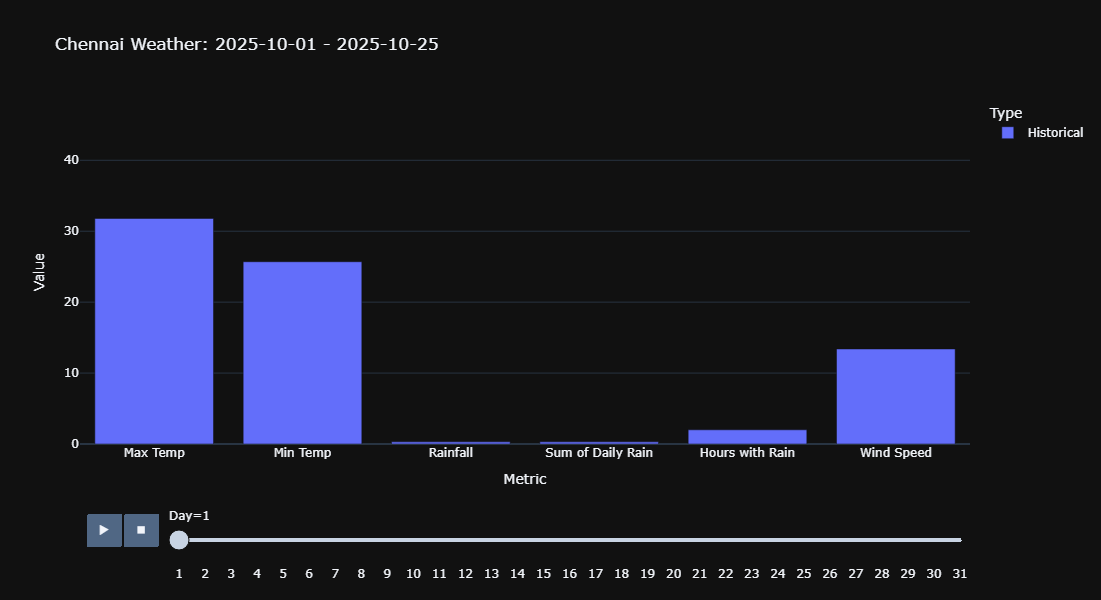

In [36]:
#Animated visualization trial2 
'''
Here we have dates under each type historical/forecast, so our vars will be these 2
'''
this_month_weather_melt = this_month_weather.melt(id_vars = ["Date","Weather","Type"],
                                                  var_name = "Metric",
                                                  value_name = "Value")
'''In the above viz date is complete in datetime format and it is difficult to follow the dates
so we here have converted that format by extracting only the day part from the Date column.
Now the visualization is clear that aligns with the animations.
'''
this_month_weather_melt["Day"] = pd.to_datetime(this_month_weather_melt["Date"]).dt.day.astype(str)
#ensuring all "Value" is numeric -
'''
We are having multiple colums for Value with different data types like temp - float, weather - string
on using pd.melt() - all comes under Value. If any non-numeric value is present then value will have mixed types.
so before plotting we need to make sure converting VALUE to NUMERIC .
this converts non-numeric to NaN that plotly skips

'''
try:
    fig1 = px.bar(this_month_weather_melt, x="Metric", y="Value", color="Type",
                  animation_frame = "Day",
                  animation_group= "Metric",
                  hover_data=["Weather"],
                  range_y = [0, this_month_weather_melt["Value"].max() + 10],
                  title = f"{place} Weather: {start_date} - {end_date}"
                 )
    
    fig1.update_layout(template = "plotly_dark", 
                      height = 600, 
                      width = 1050)
    
    fig1.show()
    #writing the html file. Animated Visualization to HTML
    '''CDN - content delivery network
    so to view this html internet connectivity is important.
    '''
    fig1.write_html("weather_animation.html", include_plotlyjs='cdn', auto_open=True)
except Exception as e:
    print(f"Exceution failed due to : {e}")
